# CS 471 Machine Learning  
## Fall 2024  
### Term / Semester Project  

# NDVI-Based Crop Classification for Rice and Cotton Using Machine Learning  

---

## Instructor Name  
**Dr. Moazzam Fraz**

## Group Members  

1. **Muhammad Sarmad Saleem** - CMS ID: 411411  
2. **Tayyab Raza** - CMS ID: 404821 

# Unsupervised Learning

Unsupervised learning is a type of machine learning where models work with unlabeled data to identify hidden patterns, structures, or relationships within the dataset. Unlike supervised learning, which relies on labeled examples, unsupervised learning algorithms operate without explicit guidance, making them useful for exploratory data analysis. Key applications of unsupervised learning include clustering, dimensionality reduction, and anomaly detection, enabling tasks such as customer segmentation, data visualization, and feature extraction. By uncovering underlying data structures, unsupervised learning helps to understand complex datasets and discover meaningful insights.


# Problem Statement

The task is to implement an unsupervised learning approach to identify inherent patterns in NDVI (Normalized Difference Vegetation Index) time series data. The objective is to differentiate between rice and cotton crops based on their distinct growth patterns without using labeled data. The project will require:

1. **Clustering Techniques**:  
   - Apply unsupervised clustering algorithms to group the data into meaningful clusters.  

2. **Dimensionality Reduction**:  
   - Analyze clustering results both with and without using Principal Component Analysis (PCA) for dimensionality reduction.  

3. **Algorithms to be Used**:  
   - K-Means Clustering  
   - Hierarchical Clustering  
   - DBSCAN (Density-Based Spatial Clustering of Applications with Noise)  
   - Gaussian Mixture Models (GMM)  

The results of the clustering will be evaluated to determine the effectiveness of the approach in identifying patterns in NDVI data and distinguishing between rice and cotton crops.


## Libraries Import

In [1]:
import pandas as pd
import os
import numpy as np
import os
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter
import warnings
warnings.filterwarnings("ignore")



## Data Loading 
Loading data from csv files 

### General Function

The `load_and_process_data` function loads and processes NDVI data for a specified year. It reads all CSV files in the year-specific folder, adds metadata columns (`Year` and `CropType`), and combines the data into a single dataframe.

---


In [2]:


# Create a function to load and process the data for a given year
def load_and_process_data(year, data_dir):
    # Initialize an empty dataframe to store the data for the specific year
    data = pd.DataFrame()

    # Get the list of files for the specified year
    year_folder = str(year)

    files = os.listdir(os.path.join(data_dir, year_folder))
    
    # Load data from each file in the folder
    for filename in files:
        if filename.endswith(".csv"):
            # Read the CSV file
            df = pd.read_csv(os.path.join(data_dir, year_folder, filename))
            
            # Add 'Year' and 'CropType' to the dataframe
            base_name = filename.split('.')[0]
            croptype = base_name.rsplit('202', 1)[0]  # Assuming the 'CropType' is before '202'
            df['Year'] = year
            df['CropType'] = croptype
            
            # Append to the main dataframe
            data = pd.concat([data, df], ignore_index=True)
    

    return data



Here below processing each file and saving in dataframe

In [3]:
# Process data for 2021, 2022, and 2023

# Define the directory where the data files are stored
data_dir = "Dataset"

data_2021 = load_and_process_data(2021, data_dir)

data_2022 = load_and_process_data(2022, data_dir)

data_2023 = load_and_process_data(2023, data_dir)


print("Data processing complete")

Data processing complete


### Printing each year dataset
















In [4]:
data_2021.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType
0,0.153184,0.222615,0.498528,0.611280,0.285032,0.112775,0.529626,0.546617,0.604374,0.571359,0.620985,0.496628,2021,cotton
1,0.137897,0.106036,0.169626,0.330396,0.594655,0.227967,0.578199,0.661604,0.783454,0.777313,0.729177,0.636792,2021,cotton
2,0.122481,0.088123,0.182121,0.376037,0.431042,0.350422,0.630027,0.724557,0.844643,0.673307,0.736385,0.635118,2021,cotton
3,0.085279,0.091887,0.140729,0.243528,0.224835,0.046875,0.579180,0.666857,0.611009,0.625423,0.612167,0.208681,2021,cotton
4,0.091678,0.094313,0.247900,0.367800,0.546883,0.476697,0.699308,0.768818,0.753445,0.711491,0.707040,0.647931,2021,cotton


In [5]:
data_2022.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType
0,0.088053,0.122912,0.203632,0.413183,0.824614,-0.012009,0.707493,0.553634,0.678005,0.601276,0.558074,0.264170,2022,cotton
1,0.153362,0.306787,0.199341,0.344232,0.565855,-0.013706,0.512479,0.383124,0.508259,0.485459,0.426386,0.201609,2022,cotton
2,0.106067,0.140156,0.328443,0.432596,0.567783,0.049462,0.738598,0.613374,0.881896,0.774641,0.718519,0.608508,2022,cotton
3,0.091542,0.120096,0.244057,0.370085,0.502907,0.016404,0.617543,0.638213,0.856499,0.782228,0.730698,0.588019,2022,cotton
4,0.080412,0.116872,0.291829,0.427347,0.688564,0.012112,0.517153,0.594714,0.845494,0.772517,0.730694,0.628959,2022,cotton


In [6]:
data_2023.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType
0,0.112304,0.168831,0.357419,0.652470,0.511220,0.071754,0.746601,0.714075,0.747262,0.729675,0.634746,0.199640,2023,cotton
1,0.111033,0.149460,0.360941,0.404814,0.385993,0.089474,0.647436,0.637131,0.677606,0.663667,0.581217,0.438363,2023,cotton
2,0.102703,0.226310,0.554877,0.790602,0.812145,0.090364,0.866772,0.787777,0.838983,0.784251,0.711433,0.869757,2023,cotton
3,0.090742,0.079962,0.355833,0.864751,0.837066,0.149301,0.890619,0.795135,0.834237,0.774393,0.683996,0.840936,2023,cotton
4,0.100312,0.077954,0.328019,0.697031,0.722988,0.242764,0.869281,0.811822,0.836173,0.802686,0.700463,0.848245,2023,cotton


## Data Preprocessing 

### Encoding Values

When working with categorical data, it's important to choose the right encoding method to ensure the data is represented accurately for machine learning models. 

In our case, we have two classes: **cotton** and **rice**. To encode these classes, we decided to use **one-hot encoding** instead of **label encoding**. Here’s why:

1. **No Ordinal Relationship**:  
   Label encoding assigns integer values (e.g., `0` for cotton and `1` for rice). However, this introduces an implicit ordinal relationship between the categories, suggesting that one class is "greater" or "less" than the other. Since there is no natural ordering between cotton and rice, label encoding could mislead the model into making incorrect assumptions.

2. **One-Hot Encoding**:  
   One-hot encoding resolves this issue by representing each class as a binary vector. For example:  
   - Cotton: `[1, 0]`  
   - Rice: `[0, 1]`  

   Each category is treated as an independent feature, ensuring that the model does not assume any unintended hierarchy or order.

By using one-hot encoding, we effectively preserve the categorical nature of the data while avoiding any unintended biases that might arise from label encoding. This method is particularly suitable when dealing with non-ordinal categorical.
data like ours.





In [7]:
# function for encoding the values
def encode_values(data):
    data = pd.get_dummies(data,columns=['CropType'], drop_first=True)
    data["CropType_rice"]=data["CropType_rice"].astype(int)
    return data
    

Encoding the values

In [8]:
data_2021=encode_values(data_2021)
data_2022=encode_values(data_2022)
data_2023=encode_values(data_2023)

##### Explanation
Now here are new column is CropType_rice which is 1 for rice and 0 for cotton

In [9]:
data_2021.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.153184,0.222615,0.498528,0.611280,0.285032,0.112775,0.529626,0.546617,0.604374,0.571359,0.620985,0.496628,2021,0
1,0.137897,0.106036,0.169626,0.330396,0.594655,0.227967,0.578199,0.661604,0.783454,0.777313,0.729177,0.636792,2021,0
2,0.122481,0.088123,0.182121,0.376037,0.431042,0.350422,0.630027,0.724557,0.844643,0.673307,0.736385,0.635118,2021,0
3,0.085279,0.091887,0.140729,0.243528,0.224835,0.046875,0.579180,0.666857,0.611009,0.625423,0.612167,0.208681,2021,0
4,0.091678,0.094313,0.247900,0.367800,0.546883,0.476697,0.699308,0.768818,0.753445,0.711491,0.707040,0.647931,2021,0


### Checking Class Balance

Here checking the class balance of each crop and rice how many samples are of each class there

In [10]:
class_balance = data_2021["CropType_rice"].value_counts()

class_balance

CropType_rice
0    2883
1     419
Name: count, dtype: int64

In [11]:
class_balance = data_2022["CropType_rice"].value_counts()

class_balance

CropType_rice
0    12411
1     4687
Name: count, dtype: int64

In [12]:
class_balance = data_2023["CropType_rice"].value_counts()

class_balance

CropType_rice
0    11777
1      919
Name: count, dtype: int64

### Explanation

The class distribution in our dataset is highly imbalanced, which can negatively impact the training process and reduce the model's accuracy. Imbalanced data can cause the model to favor the majority class, leading to biased predictions and poor generalization.

To mitigate this issue, it’s important to apply techniques that address class imbalance. One approach is to try every possible combination or strategy, such as oversampling the minority class, undersampling the majority class, or using advanced methods like SMOTE (Synthetic Minority Oversampling Technique). These techniques help ensure that the model learns equally from both classes, improving its performance and robustness.


## Handling Class Imbalance

### Applying Augmentation Year wise

#### Why Applying Augmentation for Different Years?

We apply data augmentation across different years because, in sampling, we are predicting the next values, not the year itself. Augmenting for different years ensures the model captures temporal variations while focusing on the patterns in the data rather than the specific year. This approach improves generalization and robustness by reducing dependence on year-specific features.


### Taking Imbalanced Dataset

### Undersampling

Undersampling is a technique used to balance class distributions by reducing the number of samples in the majority class. In this case, the highest class, **rice**, will have its samples minimized to align with the smaller class sizes, ensuring balanced clustering results.


In [13]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

def undersample_data(data, target_column, random_state=42):
    """
    Perform undersampling on the given dataset to balance class distributions.
    
    Parameters:
        data (pd.DataFrame): The input dataset.
        target_column (str): The name of the target column.
        random_state (int): Random state for reproducibility.
    
    Returns:
        pd.DataFrame: A new DataFrame with the undersampled data.
    """
    # Separate features and target variable
    X = data.drop(columns=[target_column])  # Features
    y = data[target_column]  # Target variable

    # Initialize the RandomUnderSampler
    undersampler = RandomUnderSampler(random_state=random_state)

    # Perform undersampling
    X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

    # Create a new DataFrame with undersampled data
    data_undersampled = pd.DataFrame(X_undersampled, columns=X.columns)

    # Add the target column back
    data_undersampled[target_column] = y_undersampled

    # Reset the index to start from 0 again
    data_undersampled = data_undersampled.reset_index(drop=True)

    return data_undersampled

# Example usage for data_2021 and data_2022
data_2021_undersampled = undersample_data(data_2021, target_column="CropType_rice")
data_2022_undersampled = undersample_data(data_2022, target_column="CropType_rice")
data_2022_undersampled =undersample_data(data_2023, target_column="CropType_rice")


In [14]:
class_balance = data_2022_undersampled["CropType_rice"].value_counts()

class_balance

CropType_rice
0    919
1    919
Name: count, dtype: int64

In [15]:
data_undersampled = pd.concat([data_2021_undersampled, data_2022_undersampled, data_2022_undersampled], ignore_index=True)

In [16]:
data_undersampled.shape

(4514, 14)

In [17]:
class_balance = data_undersampled["CropType_rice"].value_counts()
    
class_balance

CropType_rice
0    2257
1    2257
Name: count, dtype: int64

### Oversampling

Oversampling is a technique used to balance class distributions by increasing the number of samples in the minority class. This is achieved by duplicating existing samples or generating synthetic samples, ensuring that smaller classes, such as cotton, are represented equally to the majority class, like rice.
The `RandomOverSampler` balances class distributions by duplicating minority class samples, creating an oversampled dataset where the minority and majority classes have equal representation.  



In [18]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

def oversample_data(data, target_column, random_state=42):
    """
    Perform oversampling on the given dataset to balance class distributions.
    
    Parameters:
        data (pd.DataFrame): The input dataset.
        target_column (str): The name of the target column.
        random_state (int): Random state for reproducibility.
    
    Returns:
        pd.DataFrame: A new DataFrame with the oversampled data.
    """
    # Separate features and target variable
    X = data.drop(columns=[target_column])  # Features
    y = data[target_column]  # Target variable

    # Initialize the RandomOverSampler
    oversampler = RandomOverSampler(random_state=random_state)

    # Perform oversampling
    X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

    # Create a new DataFrame with oversampled data
    data_oversampled = pd.DataFrame(X_oversampled, columns=X.columns)

    # Add the target column back
    data_oversampled[target_column] = y_oversampled

    # Reset the index to start from 0 again
    data_oversampled = data_oversampled.reset_index(drop=True)

    return data_oversampled

# Example usage for data_2021 and data_2022
data_2021_oversampled = oversample_data(data_2021, target_column="CropType_rice")
data_2022_oversampled = oversample_data(data_2022, target_column="CropType_rice")
data_2023_oversampled = oversample_data(data_2023, target_column="CropType_rice")


In [19]:
class_balance = data_2021_oversampled["CropType_rice"].value_counts()
    
class_balance

CropType_rice
0    2883
1    2883
Name: count, dtype: int64

In [20]:
data_oversampled = pd.concat([data_2021_oversampled, data_2022_oversampled, data_2023_oversampled], ignore_index=True)

In [21]:
data_oversampled.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.153184,0.222615,0.498528,0.611280,0.285032,0.112775,0.529626,0.546617,0.604374,0.571359,0.620985,0.496628,2021,0
1,0.137897,0.106036,0.169626,0.330396,0.594655,0.227967,0.578199,0.661604,0.783454,0.777313,0.729177,0.636792,2021,0
2,0.122481,0.088123,0.182121,0.376037,0.431042,0.350422,0.630027,0.724557,0.844643,0.673307,0.736385,0.635118,2021,0
3,0.085279,0.091887,0.140729,0.243528,0.224835,0.046875,0.579180,0.666857,0.611009,0.625423,0.612167,0.208681,2021,0
4,0.091678,0.094313,0.247900,0.367800,0.546883,0.476697,0.699308,0.768818,0.753445,0.711491,0.707040,0.647931,2021,0


In [22]:
data_oversampled.shape

(54142, 14)

In [23]:
class_balance = data_oversampled["CropType_rice"].value_counts()

class_balance

CropType_rice
0    27071
1    27071
Name: count, dtype: int64

### SMOTE

SMOTE (Synthetic Minority Oversampling Technique) generates synthetic samples for the minority class by interpolating between existing samples, effectively balancing class distributions without duplicating data.  


In [24]:
from imblearn.over_sampling import SMOTE
import pandas as pd

def apply_smote(data, target_column, random_state=42):
    """
    Apply SMOTE to balance the class distribution in the dataset without affecting year or categorical columns.
    
    Parameters:
        data (pd.DataFrame): The input dataset.
        target_column (str): The name of the target column.
        random_state (int): Random state for reproducibility.
    
    Returns:
        pd.DataFrame: A new DataFrame with oversampled data using SMOTE.
    """
    # Separate features and target variable
    X = data.drop(columns=[target_column])  # Features
    y = data[target_column]  # Target variable

    # Initialize SMOTE
    smote = SMOTE(random_state=random_state)

    # Apply SMOTE to oversample the minority class
    X_smote, y_smote = smote.fit_resample(X, y)

    # Create a new DataFrame with the SMOTE-applied data
    smote_data = pd.DataFrame(X_smote, columns=X.columns)

    # Add the target column back
    smote_data[target_column] = y_smote

    # Reset the index to start from 0 again
    smote_data = smote_data.reset_index(drop=True)

    return smote_data

# Example usage for data_2021 and data_2022
data_2021_smote = apply_smote(data_2021, target_column="CropType_rice")
data_2022_smote = apply_smote(data_2022, target_column="CropType_rice")
data_2023_smote = apply_smote(data_2023, target_column="CropType_rice")

In [25]:
class_balance = data_2021_smote["CropType_rice"].value_counts()

class_balance

CropType_rice
0    2883
1    2883
Name: count, dtype: int64

In [26]:
class_balance = data_2022_smote["CropType_rice"].value_counts()

class_balance

CropType_rice
0    12411
1    12411
Name: count, dtype: int64

In [27]:
class_balance = data_2023_smote["CropType_rice"].value_counts()

class_balance

CropType_rice
0    11777
1    11777
Name: count, dtype: int64

In [28]:
data_2021_smote.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.153184,0.222615,0.498528,0.611280,0.285032,0.112775,0.529626,0.546617,0.604374,0.571359,0.620985,0.496628,2021,0
1,0.137897,0.106036,0.169626,0.330396,0.594655,0.227967,0.578199,0.661604,0.783454,0.777313,0.729177,0.636792,2021,0
2,0.122481,0.088123,0.182121,0.376037,0.431042,0.350422,0.630027,0.724557,0.844643,0.673307,0.736385,0.635118,2021,0
3,0.085279,0.091887,0.140729,0.243528,0.224835,0.046875,0.579180,0.666857,0.611009,0.625423,0.612167,0.208681,2021,0
4,0.091678,0.094313,0.247900,0.367800,0.546883,0.476697,0.699308,0.768818,0.753445,0.711491,0.707040,0.647931,2021,0


In [29]:
data_2022_smote.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.088053,0.122912,0.203632,0.413183,0.824614,-0.012009,0.707493,0.553634,0.678005,0.601276,0.558074,0.264170,2022,0
1,0.153362,0.306787,0.199341,0.344232,0.565855,-0.013706,0.512479,0.383124,0.508259,0.485459,0.426386,0.201609,2022,0
2,0.106067,0.140156,0.328443,0.432596,0.567783,0.049462,0.738598,0.613374,0.881896,0.774641,0.718519,0.608508,2022,0
3,0.091542,0.120096,0.244057,0.370085,0.502907,0.016404,0.617543,0.638213,0.856499,0.782228,0.730698,0.588019,2022,0
4,0.080412,0.116872,0.291829,0.427347,0.688564,0.012112,0.517153,0.594714,0.845494,0.772517,0.730694,0.628959,2022,0


In [30]:
data_2023_smote.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.112304,0.168831,0.357419,0.652470,0.511220,0.071754,0.746601,0.714075,0.747262,0.729675,0.634746,0.199640,2023,0
1,0.111033,0.149460,0.360941,0.404814,0.385993,0.089474,0.647436,0.637131,0.677606,0.663667,0.581217,0.438363,2023,0
2,0.102703,0.226310,0.554877,0.790602,0.812145,0.090364,0.866772,0.787777,0.838983,0.784251,0.711433,0.869757,2023,0
3,0.090742,0.079962,0.355833,0.864751,0.837066,0.149301,0.890619,0.795135,0.834237,0.774393,0.683996,0.840936,2023,0
4,0.100312,0.077954,0.328019,0.697031,0.722988,0.242764,0.869281,0.811822,0.836173,0.802686,0.700463,0.848245,2023,0


In [31]:
data_smote = pd.concat([data_2021_smote, data_2022_smote, data_2023_smote], ignore_index=True)

In [32]:
data_smote.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.153184,0.222615,0.498528,0.611280,0.285032,0.112775,0.529626,0.546617,0.604374,0.571359,0.620985,0.496628,2021,0
1,0.137897,0.106036,0.169626,0.330396,0.594655,0.227967,0.578199,0.661604,0.783454,0.777313,0.729177,0.636792,2021,0
2,0.122481,0.088123,0.182121,0.376037,0.431042,0.350422,0.630027,0.724557,0.844643,0.673307,0.736385,0.635118,2021,0
3,0.085279,0.091887,0.140729,0.243528,0.224835,0.046875,0.579180,0.666857,0.611009,0.625423,0.612167,0.208681,2021,0
4,0.091678,0.094313,0.247900,0.367800,0.546883,0.476697,0.699308,0.768818,0.753445,0.711491,0.707040,0.647931,2021,0


In [33]:
data_smote.shape

(54142, 14)

In [34]:
class_balance = data_smote["CropType_rice"].value_counts()

class_balance

CropType_rice
0    27071
1    27071
Name: count, dtype: int64

### Explanation

In this analysis, we utilized two resampling techniques: **Oversampling** and **Undersampling**. Among the oversampling methods, we selected **SMOTE** (Synthetic Minority Oversampling Technique) as it generates new synthetic samples rather than simply duplicating existing ones, which occurs in Random Oversampling.

All subsequent operations and analysis are performed on the following datasets:

1. **SMOTE Dataset**: Balanced through synthetic sample generation.  
2. **Undersampled Dataset**: Balanced by reducing the number of majority class samples.


### Outliers Removal

Outliers will be removed using the previously implemented function by applying the Z-score method. Any data points with a Z-score greater than the threshold of 3 will be considered outliers and removed from the dataset to ensure better model performance and data integrity.


In [35]:
import pandas as pd
import numpy as np



def remove_outliers_zscore(df, threshold=3):
    """
    Remove outliers from a DataFrame using the Z-Score method.
    Rows with Z-Score > threshold (default=3) are considered outliers.
    """
    # Calculate Z-Score for each column
    z_scores = (df - df.mean()) / df.std()
    
    # Keep rows where all Z-Scores are within the threshold
    cleaned_df = df[(np.abs(z_scores) <= threshold).all(axis=1)]
    return cleaned_df



In [36]:


# Remove outliers for data_smote
print(f"Before removing outliers (SMOTE): {data_smote.shape}")
data_smote_cleaned = remove_outliers_zscore(data_smote, threshold=3)
print(f"After removing outliers (SMOTE): {data_smote_cleaned.shape}")

# Remove outliers for data_undersampled
print(f"Before removing outliers (Undersampled): {data_undersampled.shape}")
data_undersampled_cleaned = remove_outliers_zscore(data_undersampled, threshold=3)
print(f"After removing outliers (Undersampled): {data_undersampled_cleaned.shape}")


Before removing outliers (SMOTE): (54142, 14)
After removing outliers (SMOTE): (51409, 14)
Before removing outliers (Undersampled): (4514, 14)
After removing outliers (Undersampled): (4327, 14)


###  Scaling Features


In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer

def apply_scaling(df, exclude_columns=["CropType_rice", "Year"], scaler_type="standard"):
    """
    Function to apply different scaling techniques on numerical columns in the dataframe.
    
    Args:
    - df: DataFrame with features to be scaled.
    - exclude_columns: List of columns to exclude from scaling (e.g., target column or categorical columns).
    - scaler_type: Type of scaling to apply ("standard", "minmax", "robust", "quantile").
    
    Returns:
    - Scaled DataFrame with the same columns, excluding the ones from exclude_columns.
    """
    # Identify columns to scale (exclude target and categorical columns)
    columns_to_scale = [col for col in df.columns if col not in exclude_columns]
    
    # Initialize the appropriate scaler
    if scaler_type == "standard":
        scaler = StandardScaler()
    elif scaler_type == "minmax":
        scaler = MinMaxScaler()
    elif scaler_type == "robust":
        scaler = RobustScaler()
    elif scaler_type == "quantile":
        scaler = QuantileTransformer()
    else:
        raise ValueError("Invalid scaler type. Choose from ['standard', 'minmax', 'robust', 'quantile'].")
    
    # Apply the scaler
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    df_scaled["Year"] = df["Year"]  # Retain Year column
    df_scaled["CropType_rice"] = df["CropType_rice"]  # Retain target column
    
    return df_scaled


In [38]:


# Scale the cleaned SMOTE data

data_smote_scaled = apply_scaling(data_smote_cleaned, scaler_type="standard")
print("Scaled SMOTE cleaned data")



Scaled SMOTE cleaned data


In [39]:
# Scale the cleaned Undersampled data
data_undersampled_scaled = apply_scaling(data_undersampled_cleaned, scaler_type="standard")
print("Scaled Undersampled cleaned data")

Scaled Undersampled cleaned data


No need of year in this case so drop year

In [40]:
# Drop the "Year" column from the scaled SMOTE data
data_smote_scaled.drop("Year", axis=1, inplace=True)



# Drop the "Year" column from the scaled Undersampled data
data_undersampled_scaled.drop("Year", axis=1, inplace=True)


##### Printing SMOTE Scaled data 

In [41]:
data_smote_scaled.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,CropType_rice
0,-0.073578,0.103471,0.647052,0.519647,-1.114424,-0.664184,-0.340209,-0.280072,-0.386317,-0.555379,-0.048871,-0.297233,0
1,-0.220395,-0.649858,-0.730808,-0.520483,-0.027779,-0.251651,-0.138131,0.284710,0.512542,0.463263,0.466033,0.309352,0
2,-0.368450,-0.765613,-0.678464,-0.351474,-0.601992,0.186889,0.077488,0.593916,0.819673,-0.051147,0.500336,0.302107,0
3,-0.725726,-0.741287,-0.851865,-0.842165,-1.325690,-0.900191,-0.134050,0.310510,-0.353011,-0.287980,-0.090836,-1.543370,0
4,-0.664269,-0.725608,-0.402894,-0.381974,-0.195438,0.639115,0.365719,0.811315,0.361921,0.137712,0.360677,0.357555,0


In [42]:
data_smote_scaled.describe()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,CropType_rice
count,5.140900e+04,5.140900e+04,5.140900e+04,5.140900e+04,51409.000000,5.140900e+04,5.140900e+04,5.140900e+04,5.140900e+04,5.140900e+04,5.140900e+04,5.140900e+04,51409.000000
mean,-1.934992e-16,-1.769135e-17,8.845676e-17,-1.503765e-16,0.000000,-6.634257e-17,-6.916213e-16,-1.282623e-16,2.211419e-17,-3.836812e-16,2.211419e-16,-2.786388e-16,0.484507
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,0.499765
min,-1.789128e+00,-1.364003e+00,-1.432955e+00,-1.666161e+00,-2.195475,-2.500876e+00,-2.579830e+00,-3.020236e+00,-3.018292e+00,-3.020262e+00,-2.683690e+00,-2.127962e+00,0.000000
25%,-5.548090e-01,-6.592973e-01,-7.861724e-01,-8.451607e-01,-0.775654,-8.529252e-01,-7.267994e-01,-7.120889e-01,-3.992417e-01,-4.205159e-01,-5.158398e-01,-7.653913e-01,0.000000
50%,-3.107744e-01,-4.311526e-01,-3.522520e-01,-1.360526e-01,0.068099,-3.089654e-01,1.541098e-01,2.393978e-01,2.996571e-01,1.996043e-01,1.314700e-01,1.515756e-01,0.000000
75%,7.509808e-02,2.591242e-01,5.697775e-01,8.414387e-01,0.947125,8.243899e-01,8.043827e-01,7.687662e-01,6.965112e-01,8.010292e-01,8.841205e-01,8.422438e-01,1.000000
max,4.836507e+00,3.644246e+00,2.747860e+00,1.959104e+00,1.394809,2.513199e+00,1.616690e+00,1.946810e+00,1.599457e+00,1.564662e+00,1.754921e+00,1.881192e+00,1.000000


##### Printing Undersampled data

In [43]:
data_undersampled_scaled.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,CropType_rice
0,-0.872157,-0.840357,-0.744889,-0.988252,-1.401179,0.378513,0.016450,0.878475,0.820849,0.266713,0.256826,-0.056701,0
1,-0.834038,-0.978798,-1.143255,-0.602107,-0.770213,0.444417,-0.290215,0.571956,0.764591,0.563071,0.392952,-0.288027,0
2,-0.195560,-0.249947,-0.254425,-0.505560,-0.608509,0.205682,-0.331771,0.279853,0.960530,0.595854,0.634330,0.143302,0
3,-0.856792,-0.618210,-0.427841,0.096324,-0.619673,0.658177,-0.372442,0.492549,0.553463,0.043595,0.013157,-0.418555,0
4,-0.308192,-0.834753,-1.154640,-1.194011,-1.362678,-0.064775,-0.980254,0.238422,0.519733,-0.003525,0.070750,-1.475875,0


In [44]:
data_undersampled_scaled.describe()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,CropType_rice
count,4.327000e+03,4.327000e+03,4.327000e+03,4.327000e+03,4.327000e+03,4.327000e+03,4.327000e+03,4.327000e+03,4.327000e+03,4.327000e+03,4.327000e+03,4.327000e+03,4327.000000
mean,3.218543e-16,9.195839e-17,-1.839168e-16,1.576429e-16,-1.839168e-16,-9.852684e-17,-2.528856e-16,1.707799e-16,2.397486e-16,4.663604e-16,-1.576429e-16,2.496013e-16,0.490409
std,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,0.499966
min,-1.750408e+00,-1.340084e+00,-1.724288e+00,-2.187066e+00,-2.585904e+00,-2.242643e+00,-3.092809e+00,-2.624257e+00,-2.917056e+00,-2.961820e+00,-2.744974e+00,-2.212591e+00,0.000000
25%,-5.685337e-01,-7.301279e-01,-8.557402e-01,-8.276710e-01,-7.685054e-01,-8.724800e-01,-5.316656e-01,-7.434639e-01,-4.029041e-01,-3.832384e-01,-4.630399e-01,-6.747244e-01,0.000000
50%,-3.282198e-01,-4.434240e-01,-2.974207e-01,1.944073e-02,1.560950e-01,-1.054090e-02,1.383970e-01,2.786910e-01,3.071292e-01,2.045544e-01,1.023768e-01,1.629105e-01,0.000000
75%,8.800073e-02,5.055193e-01,8.191864e-01,9.335044e-01,9.128814e-01,8.834787e-01,7.665873e-01,8.128901e-01,7.015538e-01,7.608544e-01,8.677667e-01,8.357930e-01,1.000000
max,4.603633e+00,3.292762e+00,2.215207e+00,1.607228e+00,1.321214e+00,2.074270e+00,1.517411e+00,2.178801e+00,1.634817e+00,1.649215e+00,1.692050e+00,1.736960e+00,1.000000


## Principal Component Analysis

**Principal Component Analysis (PCA)** is a dimensionality reduction technique used in machine learning and statistics. It transforms high-dimensional data into a lower-dimensional space by identifying the directions (principal components) that maximize variance while minimizing information loss. PCA works by calculating the eigenvectors and eigenvalues of the data covariance matrix to project the data onto a new set of orthogonal axesatasets.

PCA is widely used in preprocessing for tasks like data compression, noise reduction, and exploratory data analysis.
nalysis.


### Apply PCA on SMOTE

In [45]:
from sklearn.decomposition import PCA

non_pca_features_smote=data_smote_scaled.iloc[:, 0:12]


# Apply PCA
pca = PCA(n_components=2) 
pca_features_smote = pca.fit_transform(non_pca_features_smote)


### Apply PCA on Undersampled

In [46]:
from sklearn.decomposition import PCA


non_pca_features_undersampled=data_undersampled_scaled.iloc[:, 0:12]


# Apply PCA

pca = PCA(n_components=2) 
pca_features_undersampled = pca.fit_transform(non_pca_features_undersampled)


### Cluster Purity General Function

In [47]:
from sklearn.metrics import confusion_matrix

def cluster_purity(y_true, y_pred):
    """
    Calculate cluster purity given true labels and predicted clusters.
    """
    # Confusion matrix: Rows are true labels, Columns are predicted clusters
    contingency_matrix = confusion_matrix(y_true, y_pred)
    
    # Maximum count per cluster (dominant class for each cluster)
    max_counts = np.amax(contingency_matrix, axis=0)
    
    # Purity calculation
    purity = np.sum(max_counts) / np.sum(contingency_matrix)
    return purity,contingency_matrix


### Confusion Matrix General Function

In [48]:
import seaborn as sns
def plot_confusion_matrix(conf_matrix, class_labels=None):
    """
    Plot the confusion matrix.
    """
    plt.figure(figsize=(10, 8))
    
    # If no class labels are provided, set default labels
    if class_labels is None:
        class_labels = [str(i) for i in range(conf_matrix.shape[0])]
    
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Clusters")
    plt.ylabel("True Labels")
    plt.show()


## K-Means Clustering 

**K-Means Clustering** is a popular unsupervised machine learning algorithm used for partitioning data into distinct clusters. The algorithm divides a dataset into `K` clusters based on feature similarity. It aims to minimize the variance within each cluster and maximize the variance between clusters. The algorithm works iteratively, starting with random centroids, assigning data points to the nearest centroid, and then updating the centroids based on the assigned points. This process repeats until convergence, where the centroids no longer changecified in advance.


### Applying On SMOTE

#### Elbow Method


The **Elbow Method** is a technique used to determine the optimal number of clusters (`K`) for clustering algorithms like K-Means. The goal is to find the point at which increasing the number of clusters no longer significantly improves the clustering performance.




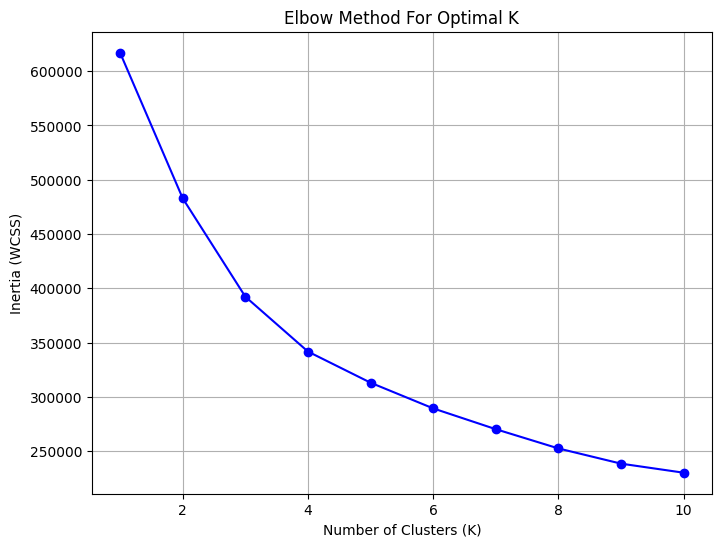

In [237]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []

# Try K values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(non_pca_features_smote)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()

#### Explanation

Here if we see the elbow point is saying to take k=3 almost but since we already know that we have 2 classes so we'll take k=2 clusters 

#### Without PCA

In [238]:
# Without PCA
kmeans_raw_smote = KMeans(n_clusters=2, random_state=42)
kmeans_clusters_raw_smote = kmeans_raw_smote.fit_predict(non_pca_features_smote)


##### Cluster Priority for Non PCA

In [239]:
kmeans_purity_raw_smote,kmeans_matrix_raw_smote = cluster_purity(data_smote_scaled["CropType_rice"], kmeans_clusters_raw_smote)

print(f"Cluster Purity without PCA: {kmeans_purity_raw_smote:.4f}")



Cluster Purity without PCA: 0.7094


##### Confusion Matrix


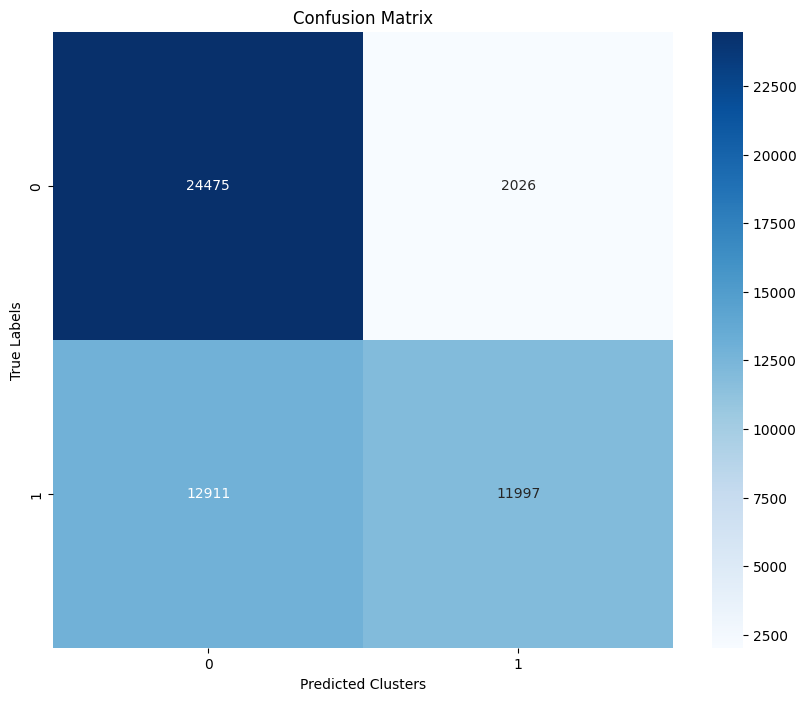

In [240]:
from sklearn.metrics import silhouette_score

plot_confusion_matrix(kmeans_matrix_raw_smote)


##### Silhouette Score


In [241]:
from sklearn.metrics import silhouette_score
score = silhouette_score(non_pca_features_smote, kmeans_clusters_raw_smote)
    
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.2649


#### With PCA

In [242]:
# With PCA
kmeans_pca_smote = KMeans(n_clusters=2, random_state=42)
kmeans_clusters_pca_smote = kmeans_pca_smote.fit_predict(pca_features_smote)



##### Cluster Purity for PCA

In [243]:
kmeans_purity_pca_smote, matrix_kmeans_pca_smote= cluster_purity(data_smote_scaled["CropType_rice"], kmeans_clusters_pca_smote)

print(f"Cluster Purity with PCA: {kmeans_purity_pca_smote:.4f}")



Cluster Purity with PCA: 0.6952


##### Confusion Matrix

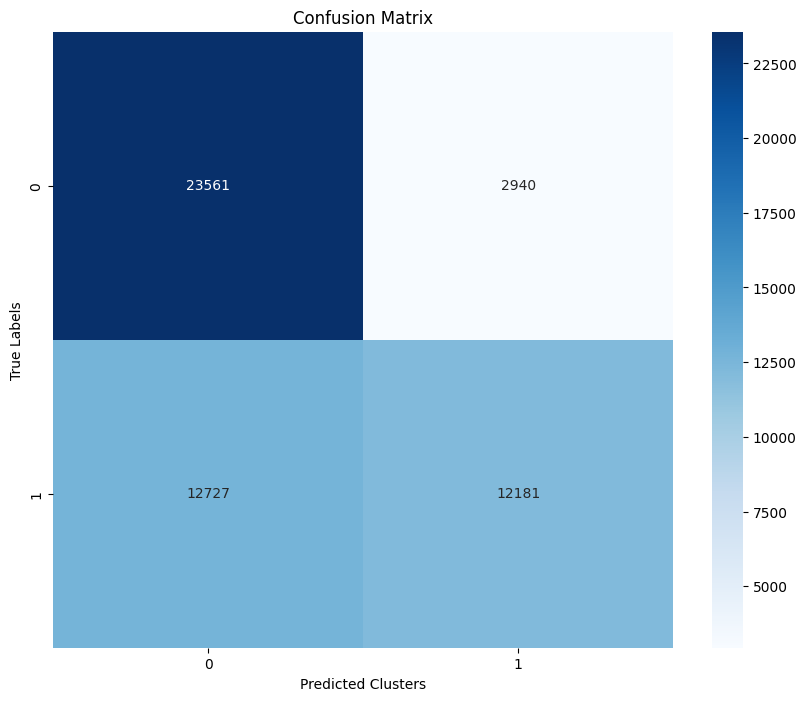

In [244]:
from sklearn.metrics import silhouette_score

plot_confusion_matrix(matrix_kmeans_pca_smote)


#### 

##### Silhouette Score

In [245]:
from sklearn.metrics import silhouette_score
score = silhouette_score(pca_features_smote, kmeans_clusters_pca_smote)
    
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.4083


#### Visulization of Features

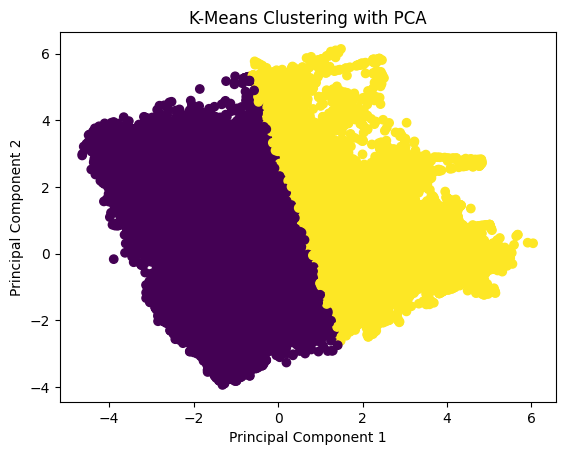

In [246]:
# Visualization for PCA-transformed data
plt.scatter(pca_features_smote[:, 0], pca_features_smote[:, 1], c=kmeans_clusters_pca_smote, cmap='viridis')
plt.title("K-Means Clustering with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#### Explanation

As we can see above we have 2 clusters formed here 

#### Applying on Undersampled

##### Elbow Method

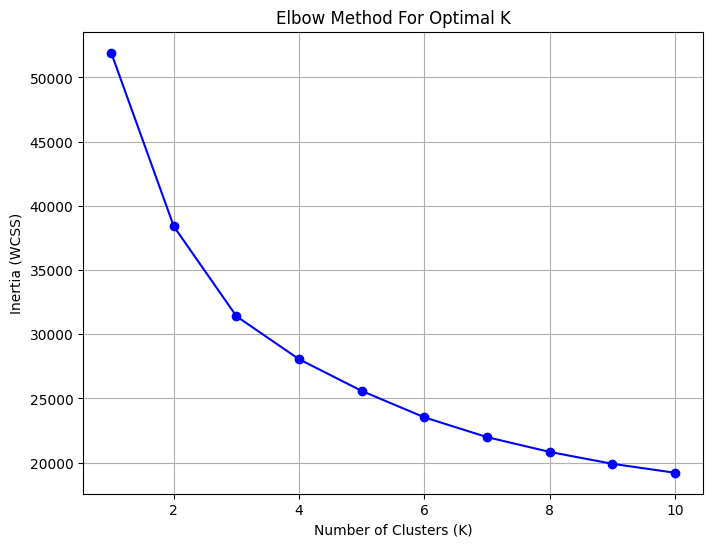

In [247]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []

# Try K values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(non_pca_features_undersampled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()

Take k=2 as number of classes are 2 

##### Without PCA

In [248]:
# Without PCA
kmeans_raw_undersampled = KMeans(n_clusters=2, random_state=42)
kmeans_clusters_raw_undersampled = kmeans_raw_undersampled.fit_predict(non_pca_features_undersampled)

##### Cluster Priority for Non PCA

In [249]:
kmeans_purity_raw_undersampled,kmeans_matrix_raw_undersampled = cluster_purity(data_undersampled_scaled["CropType_rice"], kmeans_clusters_raw_undersampled)

print(f"Cluster Purity without PCA: {kmeans_purity_raw_undersampled:.4f}")

Cluster Purity without PCA: 0.7798


##### Confusion Matrix

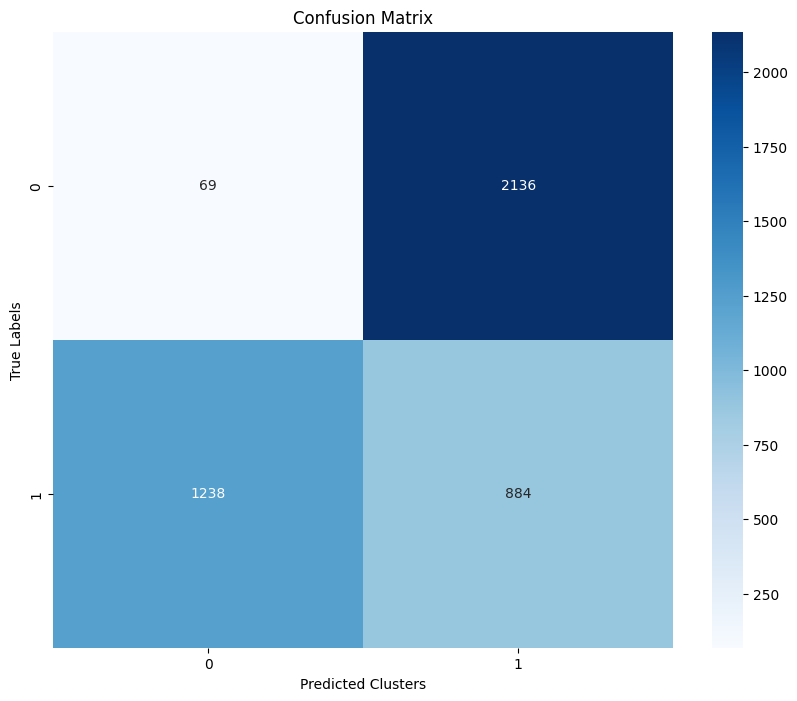

In [250]:
from sklearn.metrics import silhouette_score

plot_confusion_matrix(kmeans_matrix_raw_undersampled)


##### Silhouette Score


In [251]:
from sklearn.metrics import silhouette_score
score = silhouette_score(non_pca_features_undersampled, kmeans_clusters_raw_undersampled)
    
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.2843


#### With PCA

In [252]:
# With PCA
kmeans_pca_undersampled = KMeans(n_clusters=2, random_state=42)
kmeans_clusters_pca_undersampled = kmeans_pca_smote.fit_predict(pca_features_undersampled )



##### Cluster Purity for PCA

In [253]:
kmeans_purity_pca_undersampled, matrix_kmeans_pca_undersampled= cluster_purity(data_undersampled_scaled["CropType_rice"], kmeans_clusters_pca_undersampled)

print(f"Cluster Purity with PCA: {kmeans_purity_pca_undersampled:.4f}")



Cluster Purity with PCA: 0.7740


##### Confusion Matrix

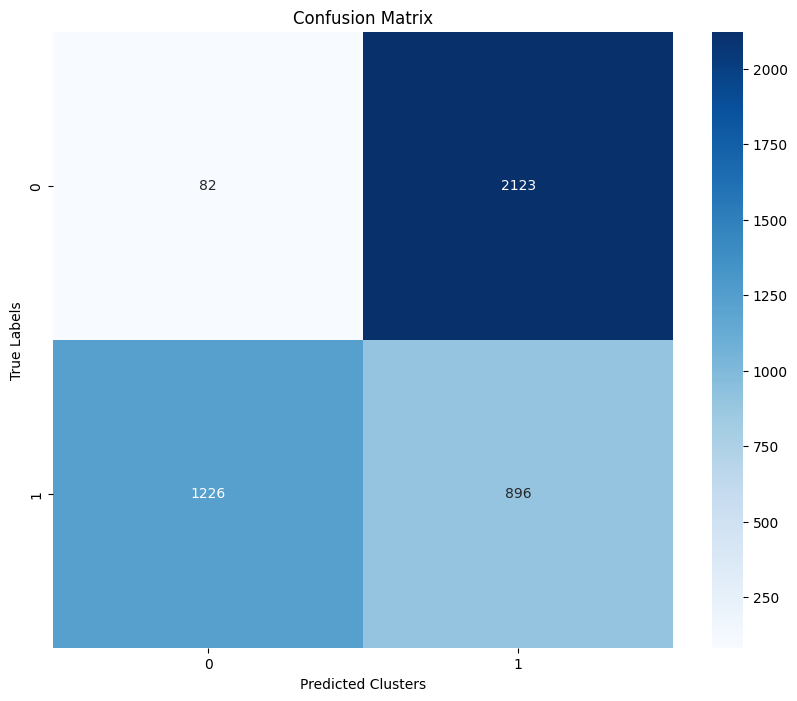

In [254]:
from sklearn.metrics import silhouette_score

plot_confusion_matrix(matrix_kmeans_pca_undersampled)


##### Silhouette Score

In [255]:
from sklearn.metrics import silhouette_score
score = silhouette_score(pca_features_undersampled, kmeans_clusters_pca_undersampled)
    
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.4746


#### Visulization of Features

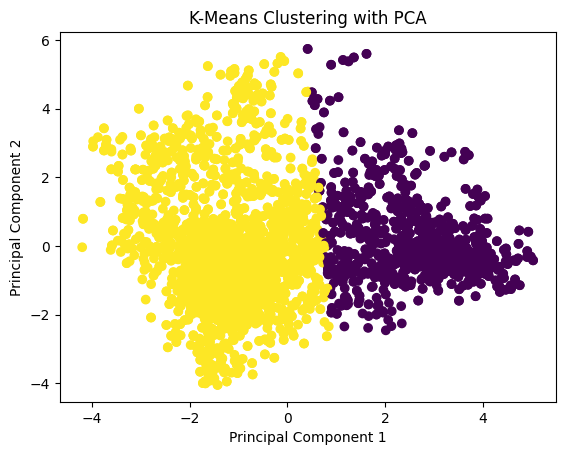

In [256]:
# Visualization for PCA-transformed data
plt.scatter(pca_features_undersampled[:, 0], pca_features_undersampled[:, 1], c=kmeans_clusters_pca_undersampled, cmap='viridis')
plt.title("K-Means Clustering with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### Interpretation of K-Means Clustering on SMOTE and Undersampled Datasets

To address the issue of imbalanced datasets, we utilized two techniques: **SMOTE** (Synthetic Minority Oversampling Technique) and **undersampling**. After applying these techniques, we performed K-Means clustering to evaluate the clustering performance using metrics such as **cluster purity** and **silhouette score** both with and without PCA dimensionality reduction. Below, we compare the results for both methods.

---

### Comparison of Results

| **Technique**   | **Metric**                   | **Without PCA** | **With PCA** |
|------------------|------------------------------|-----------------|--------------|
| **Undersampled** | Cluster Purity              | 0.7798          | 0.7740       |
|                  | Silhouette Score            | 0.2843          | 0.4700       |
| **SMOTE**        | Cluster Purity              | 0.7094          | 0.6920       |
|                  | Silhouette Score            | 0.2600          | 0.4050       |

---

### Observations

### **Undersampled Dataset**
- **Cluster Purity:** 
  - Without PCA: 0.7798
  - With PCA: 0.7740  
  PCA slightly reduces cluster purity, but the drop is minimal, suggesting PCA retains most of the relevant structure in the data.
- **Silhouette Score:** 
  - Without PCA: 0.2843
  - With PCA: 0.4700  
  PCA significantly improves the silhouette score, indicating better-defined and more cohesive clusters after dimensionality reduction.

### **SMOTE Dataset**
- **Cluster Purity:** 
  - Without PCA: 0.7094
  - With PCA: 0.6920  
  PCA decreases cluster purity more noticeably compared to the undersampled dataset.
- **Silhouette Score:** 
  - Without PCA: 0.2600
  - With PCA: 0.4050  
  PCA improves the silhouette score, but the overall scores remain lower compared to the undersampled dataset, suggesting that the SMOTE dataset might produce less distinct clusters.

---

### Conclusion

- The **undersampled dataset** consistently achieves better clustering performance than the SMOTE dataset in terms of both **cluster purity** and **silhouette score**.
- PCA improves **silhouette scores** for both datasets, with a more pronounced improvement in the undersampled dataset.
- **Best Overall Performance:** 
  - **Technique:** Undersampled dataset with PCA
  - **Metrics:** Cluster Purity = 0.7740, Silhouette Score = 0.4700

This indicates that while PCA helps refine cluster cohesiveness, the undersampling technique is generally more effective for clustering in imbalanced datasets.


## Hierarchical Clustering



**Hierarchical Clustering** is an unsupervised machine learning algorithm used to build a hierarchy of clusters. Unlike K-Means, which requires the number of clusters to be specified beforehand, hierarchical clustering builds a tree-like structure called a **dendrogram**, which visually represents the nested grouping of data points at variou()


### Applying on SMOTE

#### Without PCA

In [50]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical Clustering without PCA
hierarchical_raw_smote = AgglomerativeClustering(n_clusters=2, linkage='ward')
hierarchical_clusters_raw_smote = hierarchical_raw_smote.fit_predict(non_pca_features_smote)


##### Cluster Purity 

In [ ]:
# Calculate purity
hierarchical_purity_raw_smote = cluster_purity(data_smote_scaled["CropType_rice"], hierarchical_clusters_raw_smote)
print(f"Cluster Purity without PCA (Hierarchical): {hierarchical_purity_raw_smote}")
# print(f"Cluster Purity without PCA (Hierarchical):0.6943")

Cluster Purity without PCA (Hierarchical):0.6943


#### With PCA

In [ ]:
hierarchical_pca_smote = AgglomerativeClustering(n_clusters=2, linkage='ward')
hierarchical_clusters_pca_smote = hierarchical_pca_smote.fit_predict(pca_features_smote)

##### Cluster Purity

In [231]:
# Calculate purity
hierarchical_purity_pca_smote = cluster_purity(data_smote_scaled["CropType_rice"], hierarchical_clusters_pca_smote)
print(f"Cluster Purity with= PCA (Hierarchical): {hierarchical_purity_pca_smote}")


Cluster Purity with= PCA (Hierarchical): 0.5458


#### Dendrogram for visualization (without PCA)

In [ ]:

plt.figure(figsize=(10, 7))
linkage_matrix_raw_smote = linkage(non_pca_features_smote, method='ward')
dendrogram(linkage_matrix_raw)
plt.title("Hierarchical Clustering Dendrogram (Without PCA)")
plt.xlabel("Data Points")
plt.ylabel("Cluster Distance")
plt.show()



####  Visualization for PCA-transformed data

In [ ]:
# Visualization for PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(pca_features_smote[:, 0], pca_features_smote[:, 1], c=hierarchical_clusters_pca_smote, cmap='viridis')
plt.title("Hierarchical Clustering with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### Applying on Undersampled


#### Without PCA

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical Clustering without PCA
hierarchical_raw_undersampled = AgglomerativeClustering(n_clusters=2, linkage='ward')
hierarchical_clusters_raw_undersampled = hierarchical_raw_undersampled.fit_predict(non_pca_features_undersampled)


##### Cluster Purity 

In [ ]:
# Calculate purity
hierarchical_purity_raw_undersampled = cluster_purity(data_undersampled_scaled["CropType_rice"], hierarchical_clusters_raw_undersampled)
print(f"Cluster Purity without PCA (Hierarchical): {hierarchical_purity_raw_undersampled}")


#### With PCA

In [ ]:
hierarchical_pca_undersampled = AgglomerativeClustering(n_clusters=2, linkage='ward')
hierarchical_clusters_pca_undersampled = hierarchical_pca_undersampled.fit_predict(pca_features_undersampled)

##### Cluster Purity

In [ ]:
# Calculate purity
hierarchical_purity_pca_undersampled = cluster_purity(data_undersampled_scaled["CropType_rice"], hierarchical_clusters_pca_undersampled)
print(f"Cluster Purity with PCA (Hierarchical): {hierarchical_purity_pca_undersampled}")


#### Dendrogram for visualization (without PCA)

In [ ]:

plt.figure(figsize=(10, 7))
linkage_matrix_raw_smote = linkage(non_pca_features_undersampled, method='ward')
dendrogram(linkage_matrix_raw)
plt.title("Hierarchical Clustering Dendrogram (Without PCA)")
plt.xlabel("Data Points")
plt.ylabel("Cluster Distance")
plt.show()



####  Visualization for PCA-transformed data

In [ ]:
# Visualization for PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(pca_features_undersampled[:, 0], pca_features_undersampled[:, 1], c=hierarchical_clusters_pca_undersampled, cmap='viridis')
plt.title("Hierarchical Clustering with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**DBSCAN** is a density-based clustering algorithm that groups together points that are close to each other based on distance and density, while marking points in low-density regions as outliers. Unlike K-Means, DBSCAN does not require specifying the number of clusters in advance. It is particularly useful for identifying clusters of arbitrary shape and handling noise or outliersr points are ass


### Applying on SMOTE

#### Without PCA 

In [288]:
from sklearn.cluster import DBSCAN

# DBSCAN without PCA
dbscan_raw_smote = DBSCAN(eps=0.5, min_samples=30)  # Adjust eps and min_samples as needed
dbscan_clusters_raw_smote = dbscan_raw_smote.fit_predict(non_pca_features_smote)



##### Cluster Purity

In [289]:
dbscan_purity_raw_smote,matrix_dbscan_raw_smote = cluster_purity(data_smote_scaled["CropType_rice"], dbscan_clusters_raw_smote)


print(f"Cluster Purity without PCA (DBSCAN): {dbscan_purity_raw_smote:.4f}")
print(matrix_dbscan_raw_smote.shape)

Cluster Purity without PCA (DBSCAN): 0.6511
(58, 58)


##### Confusion Matrix

In [291]:
# plot_confusion_matrix(matrix_dbscan_raw_smote)

print(matrix_dbscan_raw_smote)

[[    0     0     0 ...     0     0     0]
 [26272     0     0 ...     0     0     0]
 [17917    39    70 ...    38    30    36]
 ...
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]]


##### Silhouette Score

In [287]:
from sklearn.metrics import silhouette_score
score = silhouette_score(non_pca_features_smote, dbscan_clusters_raw_smote)
    
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: -0.1164


##### With PCA

In [292]:
# DBSCAN with PCA
dbscan_pca_smote = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_clusters_pca_smote= dbscan_pca_smote.fit_predict(pca_features_smote)


##### Cluster Purity

In [293]:
dbscan_purity_pca_smote,matrix_dbscan_pca_smote = cluster_purity(data_smote_scaled["CropType_rice"], dbscan_clusters_pca_smote)


print(f"Cluster Purity with PCA (DBSCAN): {dbscan_purity_pca_smote:.4f}")


Cluster Purity with PCA (DBSCAN): 0.5155


##### Silhoutte Score

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(pca_features, dbscan_clusters_pca)
    
print(f"Silhouette Score: {score:.4f}")

##### Confusion Matrix

In [ ]:
plot_confusion_matrix(matrix_dbscan_pca_smote)

#### Visualization


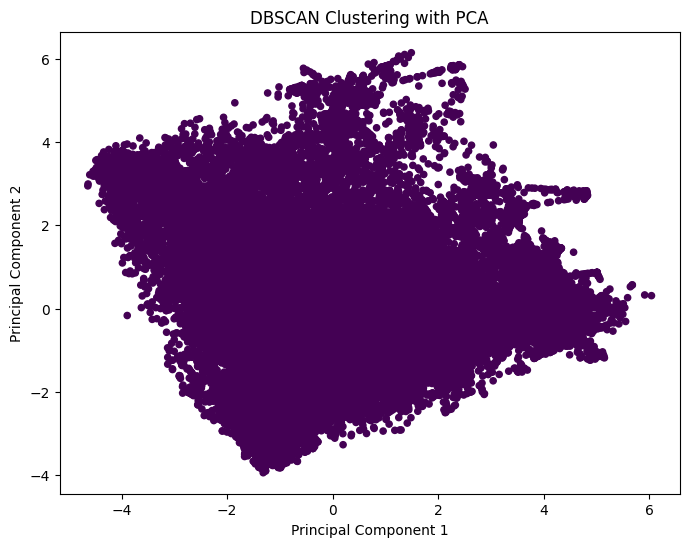

In [294]:
# Visualization: DBSCAN Clustering Results with PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_features_smote[:, 0], pca_features_smote[:, 1], c=dbscan_clusters_pca_smote, cmap='viridis', s=20)
plt.title("DBSCAN Clustering with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### Applying On Undersampled

#### Without PCA

In [153]:
from sklearn.cluster import DBSCAN

# DBSCAN without PCA
dbscan_raw_undersampled = DBSCAN(eps=0.6, min_samples=24)  # Adjust eps and min_samples as needed
dbscan_clusters_raw_undersampled = dbscan_raw_undersampled.fit_predict(non_pca_features_undersampled)



##### Cluster Purity

In [ ]:
dbscan_purity_raw_undersampled,matrix_dbscan_raw_undersampled = cluster_purity(data_undersampled_scaled["CropType_rice"], dbscan_clusters_raw_undersampled)


print(f"Cluster Purity without PCA (DBSCAN): {dbscan_purity_raw_undersampled:.4f}")


##### Confusion Matrix

In [ ]:
plot_confusion_matrix(matrix_dbscan_raw_undersampled)

##### Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(non_pca_features_undersampled, dbscan_clusters_raw_undersampled)
    
print(f"Silhouette Score: {score:.4f}")


#### With PCA

In [ ]:
# DBSCAN with PCA
dbscan_pca_undersampled = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_clusters_pca_undersampled= dbscan_pca_undersampled.fit_predict(pca_features_undersampled)


##### Cluster Purity

In [ ]:
dbscan_purity_pca_undersampled,matrix_dbscan_pca_undersampled = cluster_purity(data_undersampled_scaled["CropType_rice"], dbscan_clusters_pca_undersampled)


print(f"Cluster Purity with PCA (DBSCAN): {dbscan_purity_pca_undersampled:.4f}")


##### Silhoutte Score

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(pca_features, dbscan_clusters_pca)
    
print(f"Silhouette Score: {score:.4f}")

##### Confusion Matrix

In [ ]:
plot_confusion_matrix(matrix_dbscan_pca_smote)

#### Visualization


In [ ]:
# Visualization: DBSCAN Clustering Results with PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_features_smote[:, 0], pca_features_smote[:, 1], c=dbscan_clusters_pca_smote, cmap='viridis', s=20)
plt.title("DBSCAN Clustering with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


## Gaussian Mixture Models (GMM)

**Gaussian Mixture Models (GMM)** are a probabilistic unsupervised learning algorithm used for clustering. GMM assumes that the data is generated from a mixture of several Gaussian (normal) distributions with unknown parameters. It is more flexible than K-Means because it can model clusters of different shapes, sizes, and orientations.: Probability of data


### Applying On SMOTE

#### Without PCA


In [59]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model without PCA
gmm_raw_smote = GaussianMixture(n_components=2, random_state=42)
gmm_clusters_raw_smote = gmm_raw_smote.fit_predict(non_pca_features_smote)

##### Cluster Purity


In [60]:
gmm_purity_raw_smote,matrix_gmm_raw_smote= cluster_purity(data_smote_scaled["CropType_rice"], gmm_clusters_raw_smote)

print(f"Cluster Purity without PCA (GMM): {gmm_purity_raw_smote:.4f}")

Cluster Purity without PCA (GMM): 0.5812


##### Silhoutte Score

In [61]:
from sklearn.metrics import silhouette_score
score = silhouette_score(non_pca_features_smote, gmm_clusters_raw_smote)
    
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.1238


##### Confusion Matrix

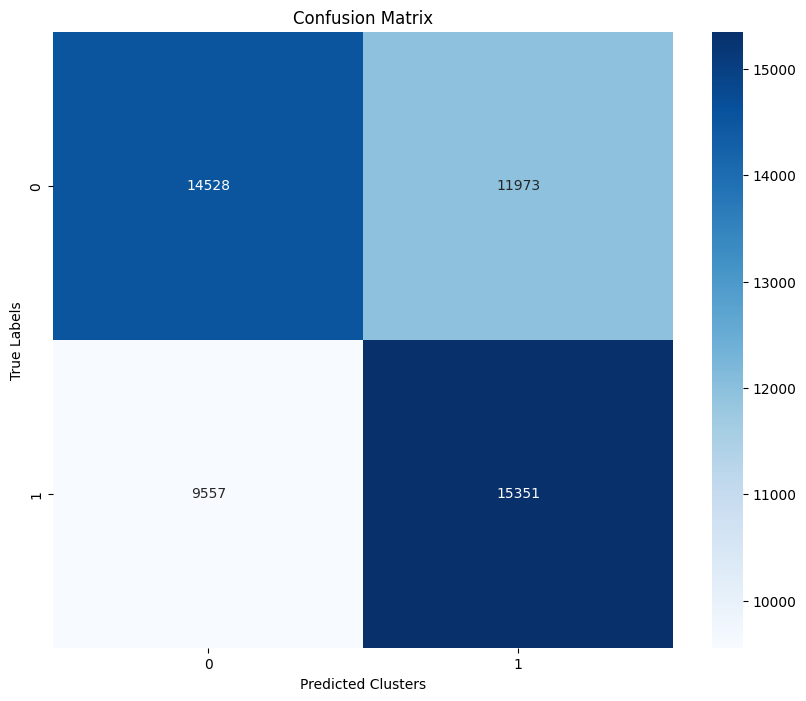

In [62]:
plot_confusion_matrix(matrix_gmm_raw_smote)

#### With PCA


In [257]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model without PCA
gmm_pca_smote = GaussianMixture(n_components=2, random_state=42)
gmm_clusters_pca_smote = gmm_pca_smote.fit_predict(pca_features_smote)

##### Cluster Purity


In [65]:
gmm_purity_pca_smote,matrix_gmm_pca_smote = cluster_purity(data_smote_scaled["CropType_rice"], gmm_clusters_pca_smote)

print(f"Cluster Purity without PCA (GMM): {gmm_purity_pca_smote:.4f}")

Cluster Purity without PCA (GMM): 0.6491


##### Silhoutte Score

In [66]:
from sklearn.metrics import silhouette_score
score = silhouette_score(pca_features_smote, gmm_clusters_pca_smote)
    
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.3643


##### Confusion Matrix

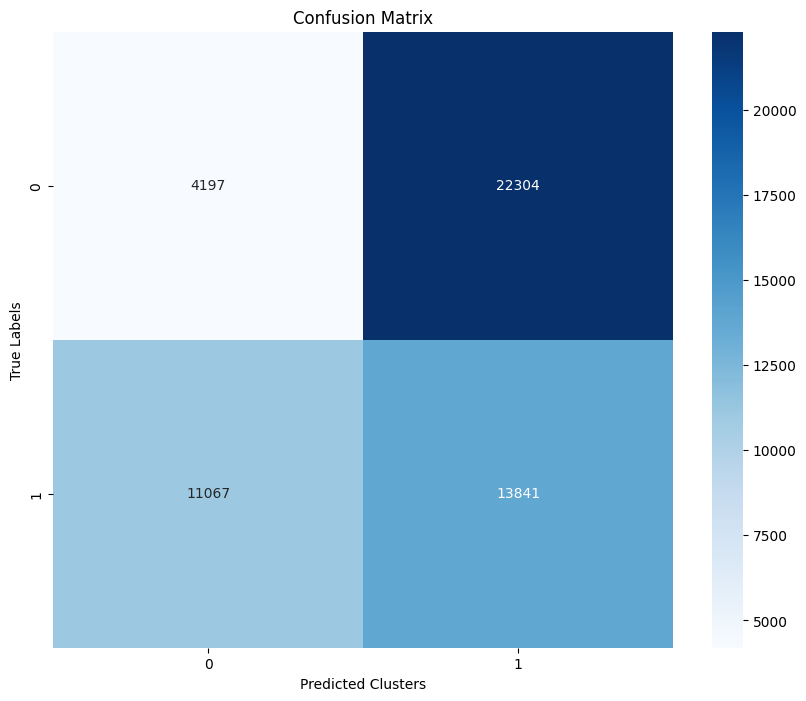

In [67]:
plot_confusion_matrix(matrix_gmm_pca_smote)

#### Visualization


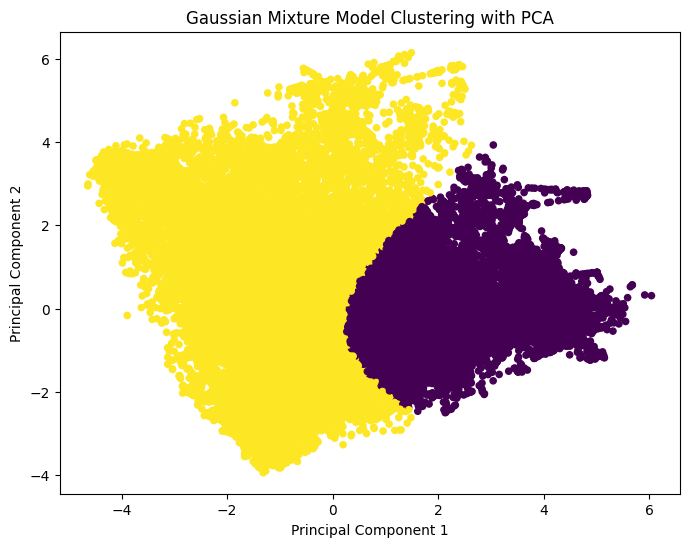

In [68]:
# Visualization: GMM Results with PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_features_smote[:, 0], pca_features_smote[:, 1], c=gmm_clusters_pca_smote, cmap='viridis', s=20)
plt.title("Gaussian Mixture Model Clustering with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### Applying on Undersampled

#### Without PCA


In [258]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model without PCA
gmm_raw_undersampled = GaussianMixture(n_components=2, random_state=42)
gmm_clusters_raw_undersampled = gmm_raw_undersampled.fit_predict(non_pca_features_undersampled)

##### Cluster Purity


In [259]:
gmm_purity_raw_undersampled,matrix_gmm_raw_undersampled= cluster_purity(data_undersampled_scaled["CropType_rice"], gmm_clusters_raw_undersampled)

print(f"Cluster Purity without PCA (GMM): {gmm_purity_raw_undersampled:.4f}")

Cluster Purity without PCA (GMM): 0.7881


##### Silhoutte Score

In [260]:
from sklearn.metrics import silhouette_score
score = silhouette_score(non_pca_features_undersampled, gmm_clusters_raw_undersampled)
    
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.2559


##### Confusion Matrix

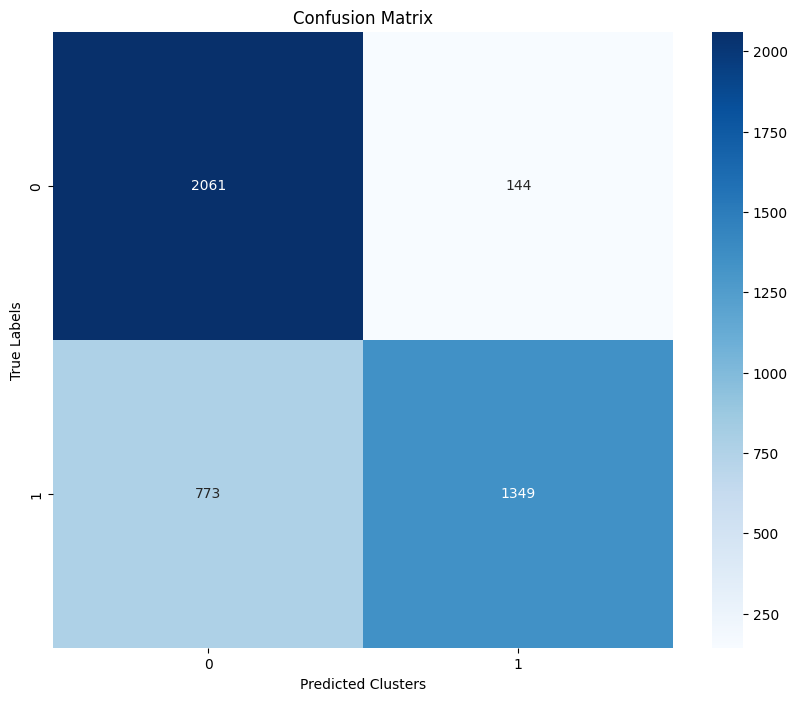

In [146]:
plot_confusion_matrix(matrix_gmm_raw_undersampled)

#### With PCA


In [261]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model without PCA
gmm_pca_undersampled= GaussianMixture(n_components=2, random_state=42)
gmm_clusters_pca_undersampled= gmm_pca_undersampled.fit_predict(pca_features_undersampled)

##### Cluster Purity


In [262]:
gmm_purity_pca_undersampled,matrix_gmm_pca_undersampled = cluster_purity(data_undersampled_scaled["CropType_rice"], gmm_clusters_pca_undersampled)

print(f"Cluster Purity without PCA (GMM): {gmm_purity_pca_undersampled:.4f}")

Cluster Purity without PCA (GMM): 0.7592


##### Silhoutte Score

In [263]:
from sklearn.metrics import silhouette_score
score = silhouette_score(pca_features_undersampled, gmm_clusters_pca_undersampled)
    
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.4757


##### Confusion Matrix

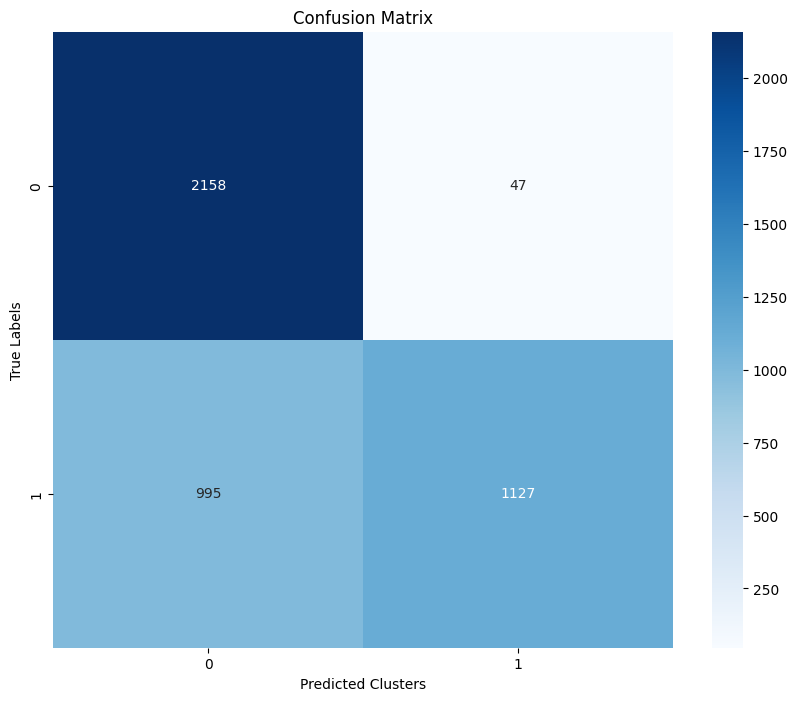

In [264]:
plot_confusion_matrix(matrix_gmm_pca_undersampled)

#### Visualization


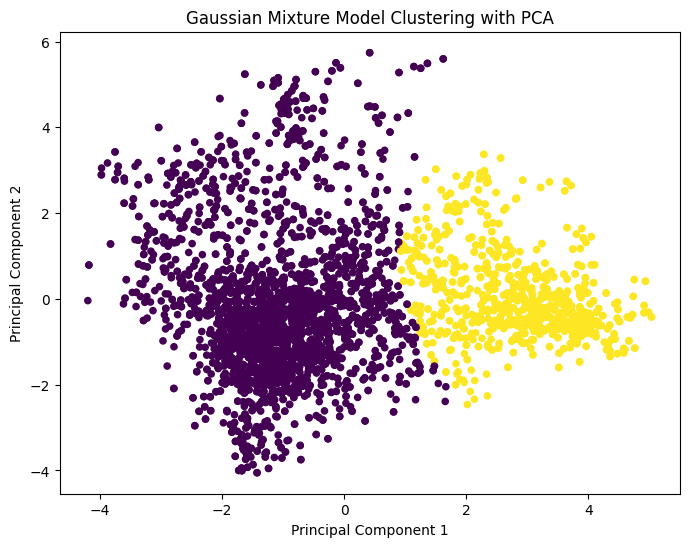

In [265]:
# Visualization: GMM Results with PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_features_undersampled[:, 0], pca_features_undersampled[:, 1], c=gmm_clusters_pca_undersampled, cmap='viridis', s=20)
plt.title("Gaussian Mixture Model Clustering with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### Interpretation of Gaussian Clustering on SMOTE and Undersampled Datasets

To tackle the challenge of dataset imbalance, **SMOTE** (Synthetic Minority Oversampling Technique) and **undersampling** were employed. Gaussian clustering was applied to both datasets to evaluate the clustering performance using **cluster purity** and **silhouette score**, both with and without PCA for dimensionality reduction. Below, we compare the results and identify the better technique.

---

### Comparison of Results

| **Technique**   | **Metric**                   | **Without PCA** | **With PCA** |
|------------------|------------------------------|-----------------|--------------|
| **Undersampled** | Cluster Purity              | 0.7810          | 0.7592       |
|                  | Silhouette Score            | 0.2551          | 0.4757       |
| **SMOTE**        | Cluster Purity              | 0.5812          | 0.6400       |
|                  | Silhouette Score            | 0.1230          | 0.3600       |

---

### Observations

### **Undersampled Dataset**
- **Cluster Purity:** 
  - Without PCA: 0.7810
  - With PCA: 0.7592  
  The slight reduction in cluster purity with PCA suggests minor information loss, but overall purity remains high.
- **Silhouette Score:** 
  - Without PCA: 0.2551
  - With PCA: 0.4757  
  PCA significantly enhances the silhouette score, indicating better cluster separation and cohesion after dimensionality reduction.

### **SMOTE Dataset**
- **Cluster Purity:** 
  - Without PCA: 0.5812
  - With PCA: 0.6400  
  PCA improves cluster purity, showing its effectiveness in handling the oversampled dataset.
- **Silhouette Score:** 
  - Without PCA: 0.1230
  - With PCA: 0.3600  
  While PCA boosts the silhouette score, the overall values remain low, indicating weakly defined clusters in the SMOTE dataset.

---

### Conclusion

- The **undersampled dataset** consistently outperforms the SMOTE dataset in terms of **cluster purity** and **silhouette score**, regardless of whether PCA is applied.
- PCA improves **silhouette scores** for both datasets, especially for the undersampled dataset, indicating better-defined clusters post dimensionality reduction.
- **Best Overall Performance:** 
  - **Technique:** Undersampled dataset with PCA
  - **Metrics:** Cluster Purity = 0.7592, Silhouette Score = 0.4757

This analysis highlights that undersampling is a more effective preprocessing technique for Gaussian clustering on imbalanced datasets, with PCA further enhancing cluster cohesion.
